###import dataset

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('/content/drive/MyDrive/KUxDEPA-Data-Science-and-Machine-Learning-Training-Course/dataset/Telco-Customer-Churn.csv')

In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
X = df[['tenure','PhoneService','MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract','MonthlyCharges']]

In [6]:
y = df['Churn']

###Train Test Split

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

###OneHotEncoder, MinMaxScaler and Column transformer

In [16]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

In [11]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [14]:
X.columns

Index(['tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'MonthlyCharges'],
      dtype='object')

In [17]:
transformer =  make_column_transformer(
   (OneHotEncoder(),['PhoneService','MultipleLines','InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract']),
   (MinMaxScaler(),['tenure','MonthlyCharges']) 
)

In [84]:
X_trainsformed = transformer.fit_transform(X_train)
X_trainsformed

array([[0.        , 1.        , 0.        , ..., 0.        , 0.04166667,
        0.57313433],
       [0.        , 1.        , 0.        , ..., 0.        , 0.76388889,
        0.41542289],
       [0.        , 1.        , 1.        , ..., 0.        , 0.95833333,
        0.85373134],
       ...,
       [0.        , 1.        , 1.        , ..., 0.        , 0.31944444,
        0.76666667],
       [0.        , 1.        , 1.        , ..., 0.        , 0.125     ,
        0.50895522],
       [0.        , 1.        , 1.        , ..., 0.        , 0.04166667,
        0.01343284]])

###Cross Validation Score

In [20]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [94]:
knn_cvA = KNeighborsClassifier(50)
knn_cvB = KNeighborsClassifier(55)
knn_cvC = KNeighborsClassifier(60)

In [95]:
cross_val_score(knn_cvA,X_trainsformed,y_train,cv=10)

array([0.78368794, 0.80141844, 0.76950355, 0.79432624, 0.81349911,
       0.77797513, 0.80461812, 0.77264654, 0.77797513, 0.77264654])

In [96]:
cross_val_score(knn_cvB,X_trainsformed,y_train,cv=10)

array([0.78191489, 0.80673759, 0.7641844 , 0.79609929, 0.81349911,
       0.78507993, 0.80106572, 0.76198934, 0.77619893, 0.76909414])

In [97]:
cross_val_score(knn_cvC,X_trainsformed,y_train,cv=10)

array([0.78546099, 0.80496454, 0.77659574, 0.81205674, 0.80994671,
       0.78685613, 0.79573712, 0.76376554, 0.78152753, 0.77619893])

In [98]:
cross_val_score(knn_cvA,X_trainsformed,y_train,cv=10).mean()

0.7868296738596425

In [99]:
cross_val_score(knn_cvB,X_trainsformed,y_train,cv=10).mean()

0.7855863346056461

In [100]:
cross_val_score(knn_cvC,X_trainsformed,y_train,cv=10).mean()

0.7893109985765214

### Grid Search

In [101]:
from sklearn.model_selection import GridSearchCV

In [102]:
knn_Search = KNeighborsClassifier()

In [103]:
parameter_grid  = {'n_neighbors':(40,45,50,55,60)}

In [104]:
grid_search = GridSearchCV(knn_Search,
                           parameter_grid,
                           cv=10)

In [105]:
grid_search.fit(X_trainsformed,y_train) 

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': (40, 45, 50, 55, 60)})

In [106]:
grid_search.best_params_ , grid_search.best_score_

({'n_neighbors': 60}, 0.7893109985765214)

### Accuracy, Precision, Recall and F1-Score

In [107]:
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score

In [108]:
predicted_y = grid_search.predict(transformer.transform(X_test))

In [110]:
accuracy =  accuracy_score(y_test,predicted_y)
precision =precision_score(y_test,predicted_y,pos_label="Yes")
recall = recall_score(y_test,predicted_y,pos_label="Yes")
f1 = f1_score(y_test,predicted_y,pos_label="Yes")

In [113]:
accuracy, precision, recall, f1

(0.8097941802696949,
 0.6435643564356436,
 0.5492957746478874,
 0.5927051671732524)

###Confusion Matrix

In [114]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [115]:
confusion_matrix(y_test,predicted_y)

array([[946, 108],
       [160, 195]])

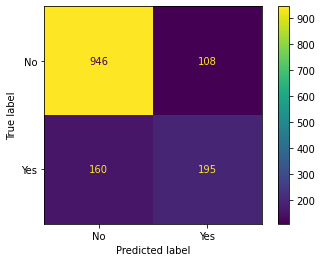

In [116]:
ConfusionMatrixDisplay.from_predictions(y_test,predicted_y)